# Math 151B Homework No. 1 (Programming Portion)

## Sec. 5.2 : Euler's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [1]:
def Euler(f,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        Y[n + 1] = Y[n] + h * f(T[n], Y[n])
        
    return T,Y

### 1.) (a)

In [74]:
def f_1(t,y):
    return t*np.exp(3*t)-2*y

In [75]:
T,Y = Euler(f_1,t_0=0,y_0=0,h=.5,N=2)

print(T)
print(Y)

[0.  0.5 1. ]
[0.         0.         1.12042227]


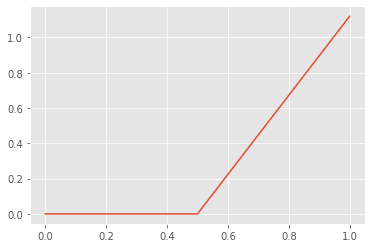

In [76]:
plt.plot(T,Y)
plt.show()

### 3.) (a)

In [77]:
def f1_exact_sol(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

In [78]:
#T_exact = np.linspace(0,1,10)
Y_exact = f1_exact_sol(T)

print(Y_exact)

[0.         0.28361652 3.21909932]


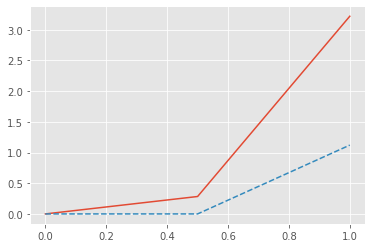

In [79]:
plt.plot(T,Y_exact)
plt.plot(T,Y,"--")
plt.show()

The dashed line is the approximate solution!

In [80]:
actual_err = np.abs(Y_exact - Y)

print(actual_err)

[0.         0.28361652 2.09867705]


### 9.)

### (a)

In [122]:
def f9(t,y):
    return (2/t)*y + (t**2)*np.exp(t)

In [123]:
def f9_sol_exact(t):
    return (t**2)*(np.exp(t)-np.exp(1))

In [124]:
T,Y = Euler(f9,t_0=1,y_0=0,h=.1,N=10)

Y_exact = f9_sol_exact(T)

In [125]:
print(Y)

[ 0.          0.27182818  0.68475558  1.27697834  2.09354769  3.18744512
  4.62081785  6.46639638  8.80911969 11.74799654 15.39823565]


In [126]:
print(Y_exact)

[ 0.          0.34591988  0.86664254  1.60721508  2.62035955  3.96766629
  5.72096153  7.96387348 10.79362466 14.32308154 18.68309708]


In [127]:
actual_err = np.abs(Y_exact-Y)

print(actual_err)

[0.         0.07409169 0.18188696 0.33023673 0.52681186 0.78022117
 1.10014368 1.4974771  1.98450497 2.57508499 3.28486143]


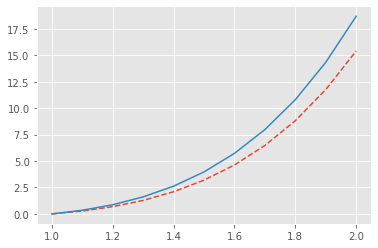

In [69]:
plt.plot(T,Y,"--")
plt.plot(T,Y_exact)
plt.show()

The dashed line is the approximate solution!

## Sec. 5.3 Higher Order Taylor Methods

### 1.) (a.)

In [92]:
def Taylor_O2(f,f1,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        Y[n + 1] = Y[n] + h * (f(T[n], Y[n]) + (h*.5)*(f1(T[n],Y[n])))
        
    return T,Y

In [98]:
def f(t,y):
    return t*np.exp(3*t) - 2*y

def f_1(t,y):
    return np.exp(3*t) + t*np.exp(3*t) + 4*y

In [99]:
T,Y_O2 = Taylor_O2(f,f_1,t_0=0,y_0=0,h=.5,N=2)

In [100]:
print(T)
print(Y_O2)

[0.  0.5 1. ]
[0.         0.125      2.02323897]


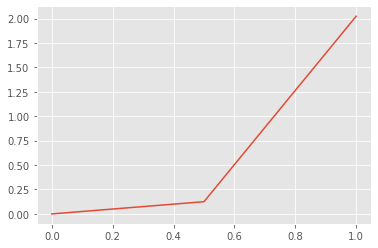

In [101]:
plt.plot(T,Y_O2)
plt.show()

### 3.) (a)

In [111]:
def Taylor_O4(f,f1,f2,f3,t_0,y_0,h,N):
    """
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    Y = np.zeros(N+1)
    
    Y[0]= y_0
    
    for n in range(N):
        x1 = Y[n]
        x2 = f(T[n],Y[n])
        x3 = (.5*h)*f1(T[n],Y[n])
        x4 = ((h**2)/6)*f2(T[n],Y[n])
        x5 = ((h**3)/24)*f3(T[n],Y[n])
        Y[n + 1] = x1 + h*(x2+x3+x4+x5)
        
    return T,Y

In [117]:
def f_2(t,y):
    return 4*np.exp(3*t) + 7*t*np.exp(3*t) - 8*y

def f_3(t,y):
    return 19*np.exp(3*t) + 13*t*np.exp(3*t) + 16*y

In [118]:
T, Y_O4 = Taylor_O4(f,f_1,f_2,f_3,t_0=0,y_0=0,h=.5,N=2)

In [119]:
print(T)
print(Y_O4)

[0.  0.5 1. ]
[0.         0.2578125  3.05529474]


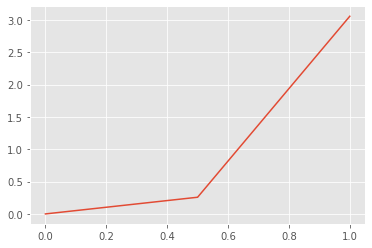

In [120]:
plt.plot(T,Y_O4)
plt.show()